# Faridat Lawal
# DTSC 710
# Assignment 6
# April 15th, 2022

In [1]:
# Import and store packages needed for classification and visualization 
import pandas as pd # save package name under variable name for easier access/usage
import numpy as np # save package name under variable name for easuer acces/usage
from sklearn.model_selection import KFold # import package/library to split data into train and test data
from sklearn import svm # import package/library to conduct classification performance of a supprt vector machine classifier
from sklearn.multiclass import OneVsOneClassifier # import store package to aid in plot for multiclass roc graph
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler # import packages to standardize and scale dataset for MLP classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, plot_roc_curve, roc_auc_score, auc # compute accuracy_score, classification report and confusion matrix for MLP classifier model; will aid in creation and calculation of auc and plot roc
import matplotlib.pyplot as plt # import package to plot and show graph of ROC for classes
from sklearn.preprocessing import label_binarize # import package to binarize classes in accelerometer dataset

In [2]:
# Import dataset and check for null values 
glass = pd.read_csv("/Users/faridatlawal/DTSC710/Assignment6/glass.csv", header=None) # read in dataset from file on computer and save to a variable name 
glass.isnull().sum() # check dataset for null values 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [3]:
# Split dataset into X and y for training and testing
X = glass.iloc[:,:10] # creates a dataframe of all features needed for training and testing in the glass dataset this will only include 10 columns 
y = glass.iloc[:,10] # creates a dataframe for target variable/classes 

In [4]:
# Implement K Fold Cross Validation 
k = 5 # save number of folds to variable name for easier access
cv = KFold(k, random_state = 73, shuffle = True) # create 5-fold cross validation that will be used to train and test our feature and target datasets

In [5]:
# Standardize/scale dataset
sc = StandardScaler() # save package name to variable for easier access/usage
sc.fit(X) # fit X dataset to standard scaler function
x=sc.transform(X) # transform values in X dataset and store new values in variable name 

In [6]:
# Support Vector Machine (SVC) Classifier
svc = OneVsRestClassifier(svm.SVC(kernel='linear', C=100, probability=True,random_state=73, decision_function_shape='ovo')) # create and store SVC classifier using the OVR classifier because dataset has 7 classes
#preds = OneVsRestClassifier(svm.SVC(kernel='linear', C=1, probability=True,random_state=73)) # create and store SVC classifier using the OVR classifier because dataset has 7 classes
acc_score = [] # empty array that will hold accuracy score for each fold
for train_index, test_index in cv.split(X): # creates for loop that will loop through each instance in the feature dataset and apply Kfold function to create training and testing sets
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:] # creates X train and test datasets and stores them
    y_train, y_test = y[train_index], y[test_index] # creates y train and test datasets and stores them
    svc.fit(X_train, y_train) # fit the x and y training sets to the SVC classifier
    y_preds = svc.predict(X_test) # predict the y target varaible/value from the provided X testing set
    #svc.decision_function_shape= 'ovr'
    #test = svc.decision_function([[1]])
    pred_prob = svc.predict_proba(X_test) # calculate and store prediction probabilities to use for ROC graph
    acc= accuracy_score(y_test, y_preds) # calculates the overall accuracy of the svc classifier model performance for each fold
    acc_score.append(acc) # appends/stores this accuracy value for each fold into empty array created above
    
acc_score # returns the accuracy score of the svc classifier calculated for each fold 

[0.9302325581395349,
 0.9302325581395349,
 0.9302325581395349,
 0.8372093023255814,
 0.9285714285714286]

Overall Accuracy: 0.911295681063123
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.94      0.94      0.94        16
           3       1.00      0.50      0.67         2
           5       0.60      1.00      0.75         3
           6       1.00      1.00      1.00         2
           7       1.00      0.80      0.89         5

    accuracy                           0.93        42
   macro avg       0.92      0.87      0.87        42
weighted avg       0.95      0.93      0.93        42



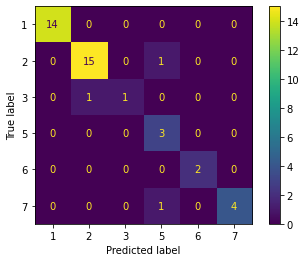

In [7]:
# Compute Overall Accuracy, Confusion Matrix and Classification Report
print('Overall Accuracy:', np.mean(acc_score)) # calculates and returns the overall average of all 5 accuracy scores from 5-fold cross validation for the svc classifier
cm_svc = confusion_matrix(y_test, y_preds) # creates and stores the confusion matrix for the svc classifier; will be used to calculate Specificity
print(classification_report(y_test, y_preds, zero_division= 0, target_names=('1', '2', '3', '5', '6', '7'))) # prints classification report on mlp model; includes Sensitivity(Recall) and F1 scores for each class as well as Precision and model accuracy
cmplt = ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds), display_labels = svc.classes_) # creates a visual graph of the confusion matrix for the mlp classifier
cmplt.plot() # plots confucion matrix of svc classifier

In [8]:
# Calculate Specificity for all six classes in glass dataset
""" Assigning TP, TN, FN, & FP values to the proper class"""
TP1 = cm_svc[0,0] # true positive value for class 1 from confusion matrix for access/usage
TP2 = cm_svc[1,1] # true positive value for class 2 from confusion matrix for access/usage
TP3 = cm_svc[2,2] # true positive value for class 3 from confusion matrix for access/usage
TP5 = cm_svc[3,3] # true positive value for class 5 from confusion matrix for access/usage
TP6 = cm_svc[4,4] # true positive value for class 6 from confusion matrix for acces/usage
TP7 = cm_svc[5,5] # true positive value for class 7 from confusion matrix for acces/usage

FN1 = cm_svc[0,1] + cm_svc[0,2] + cm_svc[0,3] + cm_svc[0,4] + cm_svc[0,5] # false negative value for class 1 from confusion matrix for access/usage
FN2 = cm_svc[1,0] + cm_svc[1,2] + cm_svc[1,3] + cm_svc[1,4] + cm_svc[1,5] # false negative value for class 2 from confusion matrix for access/usage
FN3 = cm_svc[2,0] + cm_svc[2,1] + cm_svc[2,3] + cm_svc[2,4] + cm_svc[2,5] # false negative value for class 3 from confusion matrix for access/usage
FN5 = cm_svc[3,0] + cm_svc[3,1] + cm_svc[3,2] + cm_svc[3,4] + cm_svc[3,5] # false negative value for class 5 from confusion matrix for access/usage
FN6 = cm_svc[4,0] + cm_svc[4,1] + cm_svc[4,2] + cm_svc[4,3] + cm_svc[4,5] # false negative value for class 6 from confusion matrix for access/usage
FN7 = cm_svc[5,0] + cm_svc[5,1] + cm_svc[5,2] + cm_svc[5,3] + cm_svc[5,4] # false negative value for class 7 from confusion matrix for access/usage

TN1 = TP2 + TP3 + TP5 + TP6 + TP7 + cm_svc[2,1] + cm_svc[3,1] + cm_svc[5,3] # true negative value for class 1 from confusion matrix for access/usage
TN2 = TP1 + TP3 + TP5 + TP6 + TP7 + cm_svc[5,3] # true negative value for class 2 from confusion matrix for access/usage
TN3 = TP1 + TP2 + TP5 + TP6 + TP7 + cm_svc[5,3] + cm_svc[3,1] # true negative value for class 3 from confusion matrix for access/usage
TN5 = TP1 + TP2 + TP3 + TP6 + TP7 + cm_svc[2,1] # true negative value for class 5 from confusion matrix for access/usage
TN6 = TP1 + TP2 + TP3 + TP5 + TP7 + cm_svc[5,3] + cm_svc[2,1] + cm_svc[3,1] # true negative value for class 6 from confusion matrix for access/usage
TN7 = TP1 + TP2 + TP3 + TP5 + TP6 + cm_svc[2,1] + cm_svc[3,1] # true negative value for class 7 from confusion matrix for access/usage

FP1 = cm_svc[1,0] + cm_svc[2,0] + cm_svc[3,0] + cm_svc[4,0] + cm_svc[5,0] # false positive value for class 1 from confusion matrix for access/usage
FP2 = cm_svc[0,1] + cm_svc[2,1] + cm_svc[3,1] + cm_svc[4,1] + cm_svc[5,1] # false positive value for class 2 from confusion matrix for access/usage
FP3 = cm_svc[0,2] + cm_svc[1,2] + cm_svc[3,2] + cm_svc[4,2] + cm_svc[5,2] # false positive value for class 3 from confusion matrix for access/usage
FP5 = cm_svc[0,3] + cm_svc[1,3] + cm_svc[2,3] + cm_svc[4,3] + cm_svc[5,3] # false positive value for class 5 from confusion matrix for access/usage
FP6 = cm_svc[0,4] + cm_svc[1,4] + cm_svc[2,4] + cm_svc[3,4] + cm_svc[5,4] # false positive value for class 6 from confusion matrix for access/usage
FP7 = cm_svc[0,5] + cm_svc[1,5] + cm_svc[2,5] + cm_svc[3,5] + cm_svc[4,5] # false positive value for class 7 from confusion matrix for access/usage


""" Specificity MLP: TN/TN+FP"""
print("Class 1 Specificity:", TN1/(TN1 + FP1)) # calculates and prints the specificity rate of class 1 for model performance based on values from confusion matrix
print("Class 2 Specificity:", TN2/(TN2 + FP2)) # calculates and prints the specificity rate of class 2 for model performance based on values from confusion matrix
print("Class 3 Specificity:", TN3/(TN3 + FP3)) # calculates and prints the specificity rate of class 3 for model performance based on values from confusion matrix
print("Class 5 Specificity:", TN5/(TN5 + FP5)) # calculates and prints the specificity rate of class 5 for model performance based on values from confusion matrix
print("Class 6 Specificity:", TN6/(TN6 + FP6)) # calculates and prints the specificity rate of class 6 for model performance based on values from confusion matrix
print("Class 7 Specificity:", TN7/(TN7 + FP7)) # calculates and prints the specificity rate of class 7 for model performance based on values from confusion matrix

Class 1 Specificity: 1.0
Class 2 Specificity: 0.9615384615384616
Class 3 Specificity: 1.0
Class 5 Specificity: 0.9487179487179487
Class 6 Specificity: 1.0
Class 7 Specificity: 1.0


In [9]:
# Binarize class labels from dataset
yt_binarize = label_binarize(y_test, classes= np.unique(y_test)) # binarizes the classes for ROC graph
labels = ('1', '2', '3', '5', '6', '7') # stores class label names in variable

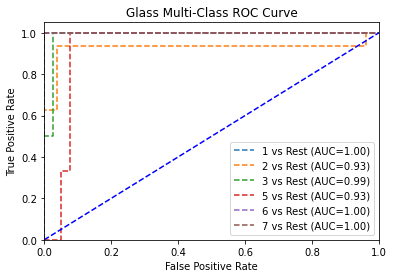

In [10]:
# Plotting ROC and AUC

fpr = {} # creates an empty dictionary that will hold the false positive rate for each class 
tpr = {} # creates an empty dictionary that will hold the true positive rate for each class 
thr = {} # creates an empty dictionary that will hold the threshold 
roc_auc = dict() # creates an empty dictionary that will hold the AUC score for each class 
n_class = 6 # stores the value of classes as a variable

for i in range(n_class): # creates for loop for that will loop only 6 times (this is the number of classes we have for glass dataset)
    fpr[i], tpr[i], thr[i] = roc_curve(yt_binarize[:,i], pred_prob[:,i]) # calculates, creates and stores the fpr, tpr and threshold for each class in the glass dataset
    roc_auc[i] = auc(fpr[i], tpr[i]) # calculates, creates and stores the auc score for each class in the glass dataset
    
    #plotting of ROC and AUC score for each class
    plt.plot(fpr[i], tpr[i], linestyle='--',
            label= '%s vs Rest (AUC=%0.2f)'%(labels[i], roc_auc[i]))
    
    
plt.plot([0,1], [0,1], 'b--') #plot baseline
plt.xlim([0,1]) # set x axis limitation
plt.ylim([0,1.05]) # set y axis limitation
plt.title('Glass Multi-Class ROC Curve') # add title to graph
plt.xlabel('False Positive Rate') # add xlabel to graph
plt.ylabel('True Positive Rate') # add ylabel to graph
plt.legend(loc='lower right') # add legend and set location as bottom right of graph
plt.show() # display/show the graph created

In [14]:
type(pred_prob)

numpy.ndarray

In [13]:
len(y_preds)

42